# Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.tree import plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

from sklearn.model_selection import train_test_split

# Importing the Dataset

Because Machine Learning algorithms are not able to process strings or plain text in their raw form, we need a way to convert these strings into numbers. Therefore, vectorization or word embedding is the process of converting text data to numerical vectors.

In [2]:
data4 = pd.read_csv('cleaned_email_data.csv')

df = pd.DataFrame(data4)
ListofWords = df['Body'].values.tolist()
combine = []
for i in ListofWords:
  combine.append(i)


X = df.Body.fillna(' ')

vectorizer = CountVectorizer(max_features=20000)
X = vectorizer.fit_transform(X).toarray()

X

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [5268, 2560,    4, ...,   24,   20,    0]])

#### Splitting the train and test dataset

In [48]:
y = np.array(df['Label'])
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape

(14920, 20000)

#### Creating the decision tree visualisation

[Text(0.5972222222222222, 0.9, 'x[4336] <= 0.5\ngini = 0.476\nsamples = 14920\nvalue = [9078, 5842]\nclass = Ham'),
 Text(0.3611111111111111, 0.7, 'x[6861] <= 0.5\ngini = 0.447\nsamples = 13323\nvalue = [8823, 4500]\nclass = Ham'),
 Text(0.2222222222222222, 0.5, 'x[4522] <= 0.5\ngini = 0.475\nsamples = 11592\nvalue = [7093, 4499]\nclass = Ham'),
 Text(0.1111111111111111, 0.3, 'x[12251] <= 0.5\ngini = 0.444\nsamples = 10091\nvalue = [6738, 3353]\nclass = Ham'),
 Text(0.05555555555555555, 0.1, 'gini = 0.419\nsamples = 9292\nvalue = [6517, 2775]\nclass = Ham'),
 Text(0.16666666666666666, 0.1, 'gini = 0.4\nsamples = 799\nvalue = [221, 578]\nclass = Spam'),
 Text(0.3333333333333333, 0.3, 'x[10794] <= 0.5\ngini = 0.361\nsamples = 1501\nvalue = [355, 1146]\nclass = Spam'),
 Text(0.2777777777777778, 0.1, 'gini = 0.255\nsamples = 1337\nvalue = [201, 1136]\nclass = Spam'),
 Text(0.3888888888888889, 0.1, 'gini = 0.115\nsamples = 164\nvalue = [154, 10]\nclass = Ham'),
 Text(0.5, 0.5, 'x[14374] <= 

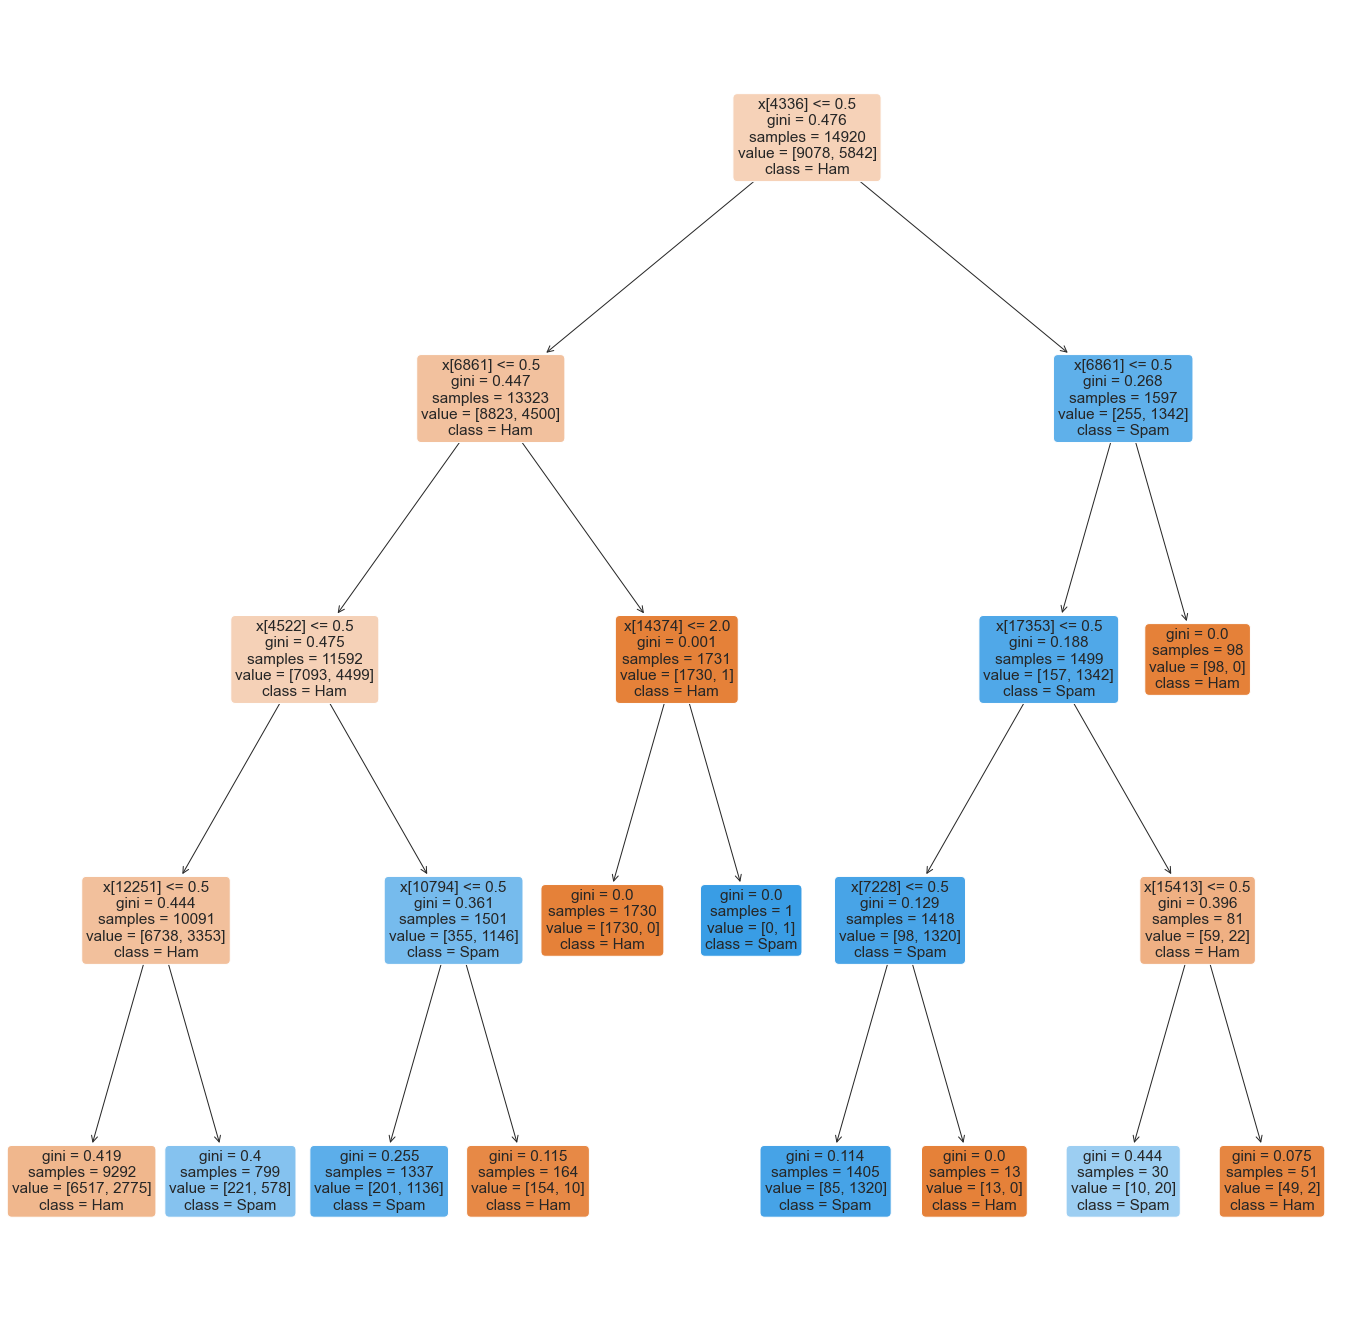

In [ ]:
tree = DecisionTreeClassifier(max_depth = 4)    
tree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(tree, filled=True, rounded=True, 
        class_names=["Ham","Spam"])

#### Next we will train 4 different models (Support Vector Classifier, K-Neighbors Classifier, Multinomial Naive Bayes, and Gradient Boosting Decision Tree) on our dataset to find out which of the models is the most accurate at detecting Spam emails.

In [21]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [108]:
def train_classifer(clf,X_train,y_train,X_test,y_test):
    
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [109]:
models ={
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'GBDT': gbdt
}

##### Checking the Accuracy and Precision scores for each model

In [ ]:
accuracy_scores = []
precision_scores = []

for name , model in models.items():
    
    current_accuracy , current_precision = train_classifer(model,X_train,y_train,X_test,y_test)
    
    print("For :", name)
    print("Accuracy : " , current_accuracy)
    print("Precision : ",current_precision,end = '\n\n')
    #print("Precision : ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For : SVC
Accuracy :  0.5638069705093833
Precision :  0.45271629778672035

For : KN
Accuracy :  0.7914209115281501
Precision :  0.6631336405529954

For : NB
Accuracy :  0.9348525469168901
Precision :  0.8796579108124618

For : GBDT
Accuracy :  0.8857908847184987
Precision :  0.9438860971524288



In [ ]:
performance = pd.DataFrame({
    'Algorithm' : models.keys() ,
    'Accuracy' : accuracy_scores ,
    'Precision' : precision_scores
}).sort_values(['Precision','Accuracy'],ascending = False)

In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
seaborn.set()

Creating a function to print metrics for a given model (TPR, FPR, TNR, FNR)

In [8]:
def metrics(model, matrix, x_test, y_test):
    def metric_calc(CM):
        TPR = CM[1][1] / (CM[1][1] + CM[1][0])  # TPR = TP / (TP + FN)
        FPR = CM[0][1] / (CM[0][1] + CM[0][0])  # FPR = FP / (FP + TN)
        TNR = CM[0][0] / (CM[0][0] + CM[0][1])  # TNR = TN / (TN + FP)
        FNR = CM[1][0] / (CM[1][0] + CM[1][1])  # FNR = FN / (FN + TP)
        return TPR, FPR, TNR, FNR

    print("Classification Accuracy in test data \t:",model.score(x_test, y_test))
    TPR, FPR, TNR, FNR = metric_calc(matrix) 
    print("TPR\t:", TPR)
    print("FPR\t:", FPR)
    print("TNR\t:", TNR)
    print("FNR\t:", FNR)

### Support Vector Classifier

In [ ]:
svcModel = svc.fit(X_train, y_train)
y_pred_svc = svcModel.predict(X_test)

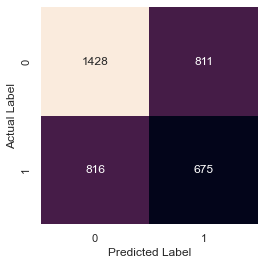

In [ ]:
mat = confusion_matrix(y_test, y_pred_svc)
seaborn.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

In [ ]:
metrics(svcModel, mat, X_test, y_test)

Classification Accuracy in test data 	: 0.5638069705093833
TPR	: 0.45423956931359355
FPR	: 0.36363636363636365
TNR	: 0.6363636363636364
FNR	: 0.5457604306864065


### K Neighbour Classifier

In [ ]:
kncModel = knc.fit(X_train, y_train)
y_pred_knc = kncModel.predict(X_test)

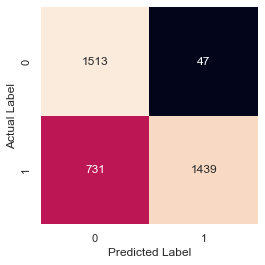

In [ ]:
mat2 = confusion_matrix(y_test, y_pred_knc)
seaborn.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

In [ ]:
metrics(kncModel, mat2, X_test, y_test)

Classification Accuracy in test data 	: 0.7914209115281501
TPR	: 0.968371467025572
FPR	: 0.32575757575757575
TNR	: 0.6742424242424242
FNR	: 0.031628532974428


### Multinomial Naive Bayes

In [49]:
mnbModel = mnb.fit(X_train, y_train)
y_predict3 = mnbModel.predict(X_test)

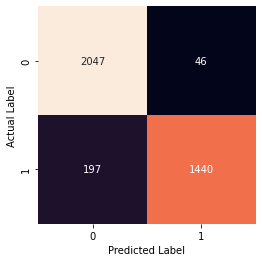

In [50]:
mat3 = confusion_matrix(y_test, y_predict3)
seaborn.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

In [51]:
metrics(mnbModel, mat3, X_test, y_test)

Classification Accuracy in test data 	: 0.9348525469168901
TPR	: 0.9690444145356663
FPR	: 0.08778966131907308
TNR	: 0.9122103386809269
FNR	: 0.03095558546433378


### Gradient Booster Decision Tree

In [52]:
gbdtModel = gbdt.fit(X_train, y_train)
y_predict4 = gbdtModel.predict(X_test)

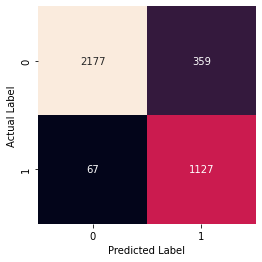

In [53]:
mat4 = confusion_matrix(y_test, y_predict4)
seaborn.heatmap(mat4.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

In [54]:
metrics(gbdtModel, mat4, X_test, y_test)

Classification Accuracy in test data 	: 0.8857908847184987
TPR	: 0.7584118438761777
FPR	: 0.029857397504456328
TNR	: 0.9701426024955436
FNR	: 0.24158815612382234


Comparing the accuracy and precision of the 4 models, Gradient Booster Decision Tree and Multinomial Naive Bayes can be seen to be the best models with the highest True Positive Rate and True Negative Rate, whilst having the lowest False Positives and False Negatives. Their precision and accuracy is also similar in the test above. Therefore to find which one is better, we will do a test on an external dataset.


### Saving the top 2 Models and Vectorizer

In [ ]:
import pickle
    
with open("mnb.pckl",mode="wb") as F:
    pickle.dump(mnbModel,F)
    
with open("gbdt.pckl",mode="wb") as F:
    pickle.dump(gbdtModel,F)
    
with open("vectorizer.pckl",mode="wb") as F:
    pickle.dump(vectorizer,F)

### Defining a function to test any phrase on any of the above 2 models

In [90]:
import nltk
import pickle
from nltk.stem import WordNetLemmatizer
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def predict_mail(mail, model, numeric = 0):
    
    model = pickle.load(open(model + ".pckl",mode="rb"))
    vectorizer = pickle.load(open("vectorizer.pckl",mode="rb"))
    
    lemma = WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english')
    
    mail = re.sub(r"http\S+", "", mail)
    mail = re.sub("[^a-zA-Z0-9]"," ",mail)
    mail = mail.lower()
    mail = nltk.word_tokenize(mail)
    mail = [lemma.lemmatize(word) for word in mail]
    mail = [word for word in mail if word not in stopwords]
    mail = " ".join(mail)
    
    vector = vectorizer.transform([mail])
    decision = model.predict(vector.toarray())
    
    if numeric == 0:
        return "Spam" if decision[0] else "Ham"
    else:
        return decision[0] 
    


[nltk_data] Downloading package stopwords to /Users/eyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/eyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/eyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Testing out the model using GBDT (or MNB if wanted) against any text input

In [91]:
predict_mail("Save up to 70 n Life Insurance. Why Spend More Than You Have To? \
SAVES you money! Let us help you get started with the best values in \
the country on new coverage. You can SAVE hundreds or even thousands \
of dollars by requesting a FREE quote from Lifequote Savings. Our \
service will take you less than 5 minutes to complete. Shop and \
compare. SAVE up to 70 n all types of Life insurance! Click Here For Your \
Free Quote!Protecting your family is the best investment you'll ever \
make!\
If you are in receipt of this email \
in error and/or wish to be removed from our list, PLEASE CLICK HERE AND TYPE REMOVE. If you \
reside in any state which prohibits e-mail solicitations for insurance, \
please disregard this \
email.\
", "gbdt")

'Spam'

# External Testing

As a group, we extracted our own Spam and Ham emails from Gmail using their Spam category feature, testing the dataset on our GBDT and MNB model

In [133]:
Sample_test = pd.read_csv("Extract_Spam.csv")
Sample_test = pd.DataFrame(Sample_test)
Sample_test = Sample_test[Sample_test.columns[1:]]

def confuse_mail(dataset, model):

  CM = [[0,0],[0,0]]

  for index, mail in dataset.iterrows():
    actual_truth = mail['Label']
    predicted_truth = predict_mail(mail['Body'],model, numeric=1)

    if (predicted_truth == 1):
      if (predicted_truth == actual_truth): #TP
        CM[1][1] += 1
      elif (predicted_truth != actual_truth): #FP
        CM[1][0] += 1
    
    elif (predicted_truth == 0):
      if (predicted_truth == actual_truth): #TN
        CM[0][0] += 1
      elif (predicted_truth != actual_truth): #FN
        CM[0][1] += 1

  def metric_calc(CM):
      TPR = CM[1][1] / (CM[1][1] + CM[0][1])  # TPR = TP / (TP + FN)
      FPR = CM[1][0] / (CM[1][0] + CM[0][0])  # FPR = FP / (FP + TN)
      TNR = CM[0][0] / (CM[0][0] + CM[1][0])  # TNR = TN / (TN + FP)
      FNR = CM[0][1] / (CM[0][1] + CM[1][1])  # FNR = FN / (FN + TP)
      return TPR, FPR, TNR, FNR

  TPR, FPR, TNR, FNR = metric_calc(CM) 
  print("TPR\t:", TPR)
  print("FPR\t:", FPR)
  print("TNR\t:", TNR)
  print("FNR\t:", FNR)  
  
  return CM  

### GBDT Model Prediction

In [134]:
print("GBDT:")
cmGBDT = confuse_mail(Sample_test,"gbdt")

GBDT:
TPR	: 0.7243589743589743
FPR	: 0.189873417721519
TNR	: 0.810126582278481
FNR	: 0.27564102564102566


Printing the Confusion Matrix for GBDT

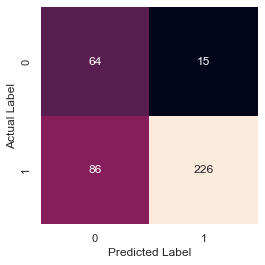

In [137]:
cmGBDT = np.array(cmGBDT)
seaborn.heatmap(cmGBDT.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

### MNB Model Prediction

In [138]:
print("MNB:")
cmMNB = confuse_mail(Sample_test, 'mnb')

MNB:
TPR	: 0.9102564102564102
FPR	: 0.4177215189873418
TNR	: 0.5822784810126582
FNR	: 0.08974358974358974


Printing the Confusion Matrix for MNB

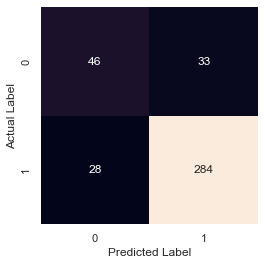

In [139]:
cmMNB = np.array(cmMNB)
seaborn.heatmap(cmMNB.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

## Try out your own spam/ham emails on our model!

In [140]:
predict_mail('Paste your email here', 'gbdt')

'Ham'